<h1 style="color:blue; text-align:center;"> Customer segmentation </h1>

                                            

<h2 style="color:Red;">Problem Statement:</h2><br>
Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data, companies can then outperform the competition by developing uniquely appealing products and services.
The most common ways in which businesses segment their customer base are:<br>

**1. Demographic information** includes gender, age, familial and marital status, income, education, and occupation.

**2. Geographical information** which differs depending on the scope of the company. For localized businesses, this info might pertain to specific towns or counties. On the other hand, it might mean a customer’s city, state, or even country of residence for larger companies.

**3. Psychographics**, such as social class, lifestyle, and personality traits.

**4. Behavioural data**, such as spending and consumption habits, product/service usage, and desired benefits.

Advantages of Customer Segmentation
1. Determine appropriate product pricing.
2. Develop customized marketing campaigns.
3. Design an optimal distribution strategy.
4. Choose specific product features for deployment.
5. Prioritize new product development efforts. You have to create a project to segment a customer for a banking client based on their transaction history. You have to find out the purchasing capabilities of customers for a different part of the customer.

this application is going to study the behavioural information of the customer based on their past transaction and based on that customer segmentation will be studied.

**Dataset:**
<a href="https://www.kaggle.com/code/fabiendaniel/customer-segmentation/data">Kaggle Customer Segmentation</a>

### the ML pipeline
1. Data Preprocessing(EDA)                      
    1.1 Data Wrangling      
    1.2 Data Analysis 
    
    

2. Model Building                        
3. Model Deployment                       

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import nums_from_string
import re
import datetime
import calendar
from sklearn import metrics

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context("notebook",font_scale=1)


# library for warning ignorance
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
cust_df=pd.read_csv('data.csv',encoding= 'unicode_escape')
cust_df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/2010 8:26       2.55     17850.0  United Kingdom  
1        12/1/2010 8:26       3.39     17850.0  United Kingdom  
2        12/1/2010 8:26       2.75     17850.0  United Kingdom  
3        12/1/2010 8:26       3.39     17850.0  United Kingdom  
4        12/1/2010 8:26       3.39     17850.0  United Kingdom  
...                 ...        ...         ...             ...  
541904  12/9/2011 12:50       0.85     12680.0          France  
541905  12/9/2011 12:50       2.10     12680.0          France  
541906  12/9/2011 12:50       4.15     12680.0          France  
541907  12/9/2011 12:50       4.15     12680.0          France  
541908  12/9/2011 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

## 1. Data preprocessing(EDA)

In [3]:
# checking the shape
cust_df.shape

(541909, 8)

In [4]:
# checking the dataframe information
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Data description:**

This dataframe contains 8 variables that correspond to:

**1. InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**2. StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

**3. Description:** Product (item) name. Nominal.

**4. Quantity:** The quantities of each product (item) per transaction. Numeric.

**5. InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated.

**6. UnitPrice:** Unit price. Numeric, Product price per unit in sterling.

**7. CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**8. Country:** Country name. Nominal, the name of the country where each customer resides.

### 1.1 Data Wrangaling

In [5]:
# shape of the dataframe
print('Dataframe dimensions:', cust_df.shape)
#____________________________________________________________
# gives some infos on columns types and numer of null values
df_info=pd.DataFrame(cust_df.dtypes).T.rename(index={0:'column type'})
df_info=df_info.append(pd.DataFrame(cust_df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
df_info=df_info.append(pd.DataFrame(cust_df.isnull().sum()/cust_df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
df_info

Dataframe dimensions: (541909, 8)


InvoiceNo StockCode Description Quantity InvoiceDate  \
column type         object    object      object    int64      object   
null values (nb)         0         0        1454        0           0   
null values (%)        0.0       0.0    0.268311      0.0         0.0   

                 UnitPrice CustomerID Country  
column type        float64    float64  object  
null values (nb)         0     135080       0  
null values (%)        0.0  24.926694     0.0

**1.1.1 handling null values**

In [6]:
((cust_df.isnull().sum()/len(cust_df))*100).sort_values(ascending=False)

CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

customer id is identification number for each customer so it is not a continous variable, it should be converted into object type

In [7]:
cust_df=cust_df[~cust_df.CustomerID.isnull()]
((cust_df.isnull().sum()/len(cust_df))*100).sort_values(ascending=False)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [8]:
cust_df.shape

(406829, 8)

**Null values are handled successfully**

**1.1.2. Inspecting data type of columns**

In [9]:
cust_df.CustomerID=cust_df.CustomerID.astype('object')
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [10]:
cust_df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55    17850.0  United Kingdom  
1  12/1/2010 8:26       3.39    17850.0  United Kingdom  
2  12/1/2010 8:26       2.75    17850.0  United Kingdom  
3  12/1/2010 8:26       3.39    17850.0  United Kingdom  
4  12/1/2010 8:26       3.39    17850.0  United Kingdom

In [11]:
# converting CustomerID to object type because it is a categorical column
cust_df['CustomerID']=cust_df.CustomerID.apply(lambda x: str(x).split('.')[0])

In [12]:
# rechecking the dataframe
cust_df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country  
0  12/1/2010 8:26       2.55      17850  United Kingdom  
1  12/1/2010 8:26       3.39      17850  United Kingdom  
2  12/1/2010 8:26       2.75      17850  United Kingdom  
3  12/1/2010 8:26       3.39      17850  United Kingdom  
4  12/1/2010 8:26       3.39      17850  United Kingdom

In [13]:
cust_df["Invoicedt"] = pd.to_datetime(cust_df["InvoiceDate"])

cust_df['InvoiceYear']=pd.DatetimeIndex(cust_df['Invoicedt']).year

cust_df['InvoiceMonth']=cust_df['Invoicedt'].dt.month

cust_df['Month'] = cust_df['InvoiceMonth'].apply(lambda x: calendar.month_abbr[x])

cust_df.drop(columns='InvoiceMonth',inplace=True,axis=1)

In [14]:
cust_df.InvoiceNo.value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
554155      1
570248      1
545414      1
545418      1
565192      1
Name: InvoiceNo, Length: 22190, dtype: int64

invoice number holds the information about the order placed by the customer. it holds only the unique id of the transaction, so this is not much significant but this feature also holds the information about the cancelled order, so segregating the canceled order from the original dataframe will help to create segment of the canceled oredr.

In [15]:
# creating new feature canceled flag for true value for canceled order
cust_df['canceled'] = cust_df['InvoiceNo'].apply(lambda x:int('C' in x))

#cust_df.shape

cust_df.head()

# seperating the canceled order from the original dataframe and creating new canceled dataframe
canceled_cust_df=cust_df[cust_df.canceled==1]
canceled_cust_df.reset_index(inplace=True,drop=True)
canceled_cust_df.head()

# removing the canceled order transaction from the original dataframe
cust_df=cust_df[cust_df.canceled==0]
cust_df.drop('canceled',axis=1,inplace=True)
cust_df.shape

cust_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country           Invoicedt  \
0  12/1/2010 8:26       2.55      17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75      17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   

   InvoiceYear Month  
0         2010   Dec  
1         2010   Dec  
2         2010   Dec  
3         2010   Dec  
4         2010   Dec

**1.1.3. inspecting outliers**

In [16]:
# checking the data distribution of the numerical column
cust_df.describe()

Quantity      UnitPrice    InvoiceYear
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174    2010.934259
std       180.420210      22.096788       0.247829
min         1.000000       0.000000    2010.000000
25%         2.000000       1.250000    2011.000000
50%         6.000000       1.950000    2011.000000
75%        12.000000       3.750000    2011.000000
max     80995.000000    8142.750000    2011.000000

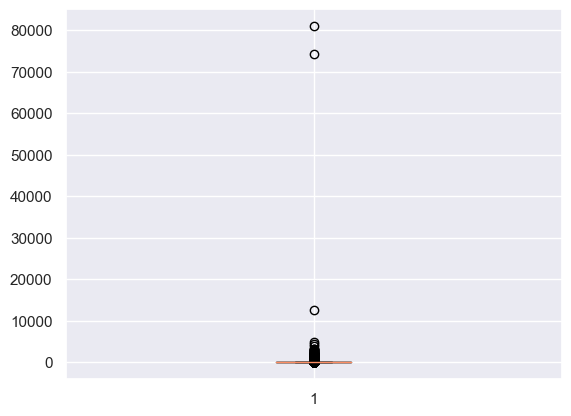

In [17]:
# plotting the data distribution of the Quantity feature
plt.boxplot(cust_df.Quantity)
plt.show()

an outlier is an extreme data point which has huge difference from other observation. and it will be very difficult to analyse the data for meaningful insight with the outlier. above boxplot shows the outlier of the Quantity feature and it is very difficult to get any insight from it.
so for outlier handling there are two ways either to remove them or cap them within the limit.

In [18]:
# checking data distribution for multiple percentile
cust_df.Quantity.quantile([0,0.01,0.02,0.03,0.04,0.9,0.95,0.99,1])

0.00        1.0
0.01        1.0
0.02        1.0
0.03        1.0
0.04        1.0
0.90       24.0
0.95       36.0
0.99      120.0
1.00    80995.0
Name: Quantity, dtype: float64

In [19]:
cust_df[cust_df.Quantity>120].Quantity.value_counts().sum()

3896

In [20]:
cust_df.shape

(397924, 11)

In [21]:
# removing the outlier
cust_df=cust_df[cust_df.Quantity<=120]
cust_df.shape

(394028, 11)

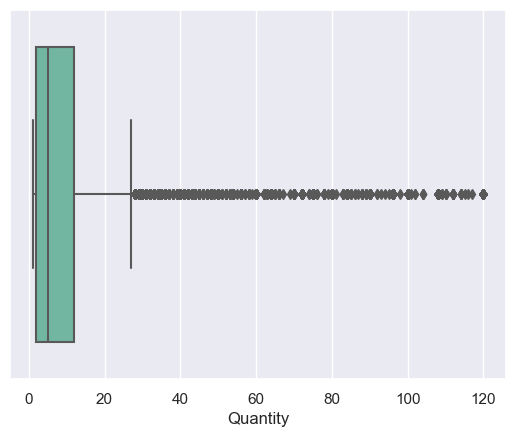

In [22]:
sns.boxplot(cust_df.Quantity)
plt.show()

Quantity feature still has some outlier but these outlier holding important information about the customer who interested in high quantity value

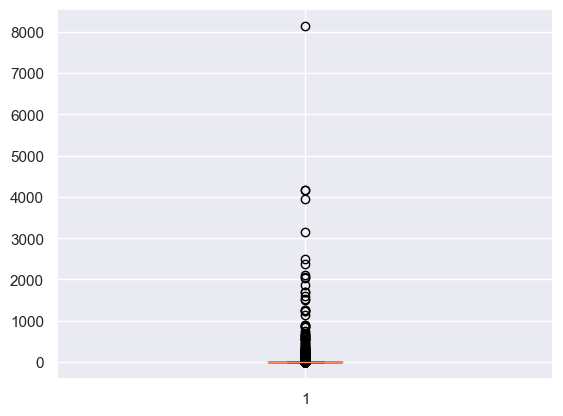

In [23]:
# analysing the unitPrice for outlier
plt.boxplot(cust_df.UnitPrice)
plt.show()

In [24]:
cust_df.UnitPrice.quantile([0.9,0.93,0.95,0.99,1])

0.90       6.45
0.93       7.95
0.95       8.50
0.99      14.95
1.00    8142.75
Name: UnitPrice, dtype: float64

99 percentile value is 14.95 and 100 is 8142.75 within one percentile there is huge diffence between the data points hence data points beyond the value 14.95 is outlier and will be removed from the dataframe.

In [25]:
# checking the number of rows for the outlier count
cust_df[cust_df.UnitPrice>14.95].shape

(3734, 11)

In [26]:
# removing the outlier from UnitPrice
cust_df=cust_df[cust_df.UnitPrice<=14.95]
cust_df.shape

(390294, 11)

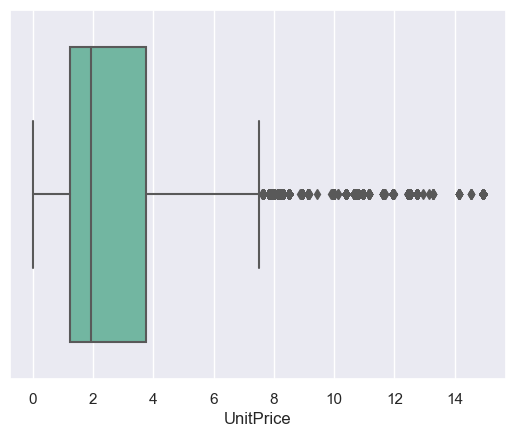

In [27]:
# replotting the boxplot for UnitPrice
sns.boxplot(cust_df.UnitPrice)
plt.show()

UnitPrice still has some outliers but theses data points for the customer which helps in improving the business 

**new feature creation**

the target of this application is to segment the customer based on their purchasing behaviour. since the dataframe has two feature based on that customer purchasing behaviour can be analysed i.e. Quantity and Unitprice. using these two feature a new feature order_value will be created which helps in studying the trasaction value of each customer based on that segmentation will be performed.

In [28]:
# creating new feature
cust_df['OrderValue']=cust_df['Quantity']*cust_df['UnitPrice']
cust_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country           Invoicedt  \
0  12/1/2010 8:26       2.55      17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75      17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   

   InvoiceYear Month  OrderValue  
0         2010   Dec       15.30  
1         2010   Dec       20.34  
2         2010   Dec       22.00  
3         2010   Dec       20.34  
4         2010   Dec       20.34

## 1.2 Data Analysis

### 1.2.1 Univariate Analysis

In [29]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390294 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    390294 non-null  object        
 1   StockCode    390294 non-null  object        
 2   Description  390294 non-null  object        
 3   Quantity     390294 non-null  int64         
 4   InvoiceDate  390294 non-null  object        
 5   UnitPrice    390294 non-null  float64       
 6   CustomerID   390294 non-null  object        
 7   Country      390294 non-null  object        
 8   Invoicedt    390294 non-null  datetime64[ns]
 9   InvoiceYear  390294 non-null  int64         
 10  Month        390294 non-null  object        
 11  OrderValue   390294 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 38.7+ MB


there are only 8 features in the dataframe. so in this section each feature will be analyse based on the problem statement

In [30]:
cust_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice CustomerID         Country           Invoicedt  \
0  12/1/2010 8:26       2.55      17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75      17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39      17850  United Kingdom 2010-12-01 08:26:00   

   InvoiceYear Month  OrderValue  
0         2010   Dec       15.30  
1         2010   Dec       20.34  
2         2010   Dec       22.00  
3         2010   Dec       20.34  
4         2010   Dec       20.34

**1. StockCode**

In [31]:
cust_df.StockCode.value_counts()

85123A    1998
22423     1707
85099B    1560
47566     1385
84879     1355
          ... 
20678        1
90059D       1
90169        1
90202A       1
71143        1
Name: StockCode, Length: 3626, dtype: int64

In [32]:
cust_df.StockCode.nunique()

3626

This feature is to uniquely identifying the item. there are 3626 items available for the customer

**2. Description**

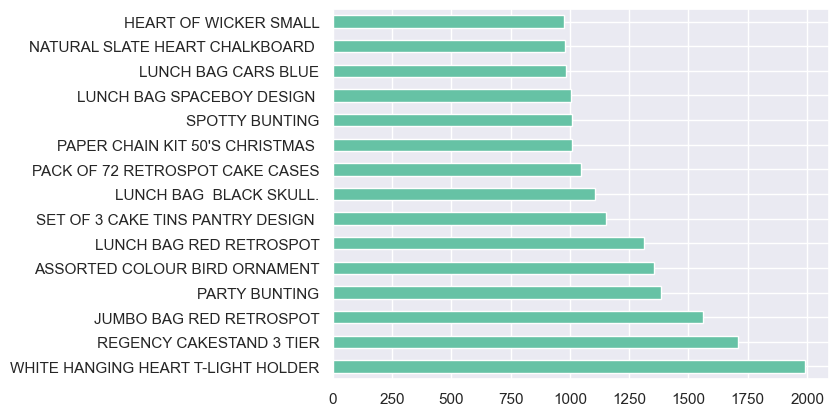

In [33]:
# plotting a bar graph for top 15 products in demand
cust_df.Description.value_counts().head(15).plot(kind='barh')
plt.show()

**Insight:**
White hanging Heart T-Light holder is the most frequent products demanded by the customer based on the value count.

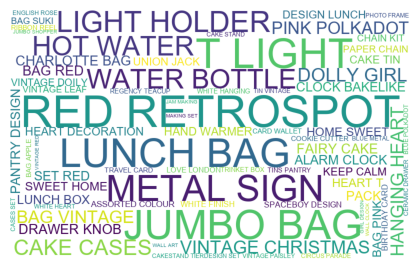

In [34]:
# plotting a word cloud for the product feature
text = " ".join(item for item in cust_df.Description)
 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',font_path='arial',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Insight**
1. from the word cloud Bags like jumbo bag, lunch bag, Charlotte bag , bag vintage are most common among customer.
2. Other popular items are  T-light, Light Holder, Metal Sugn, Vintage Christmas, Water bottle, Hot water etc.

**3. Quantity**

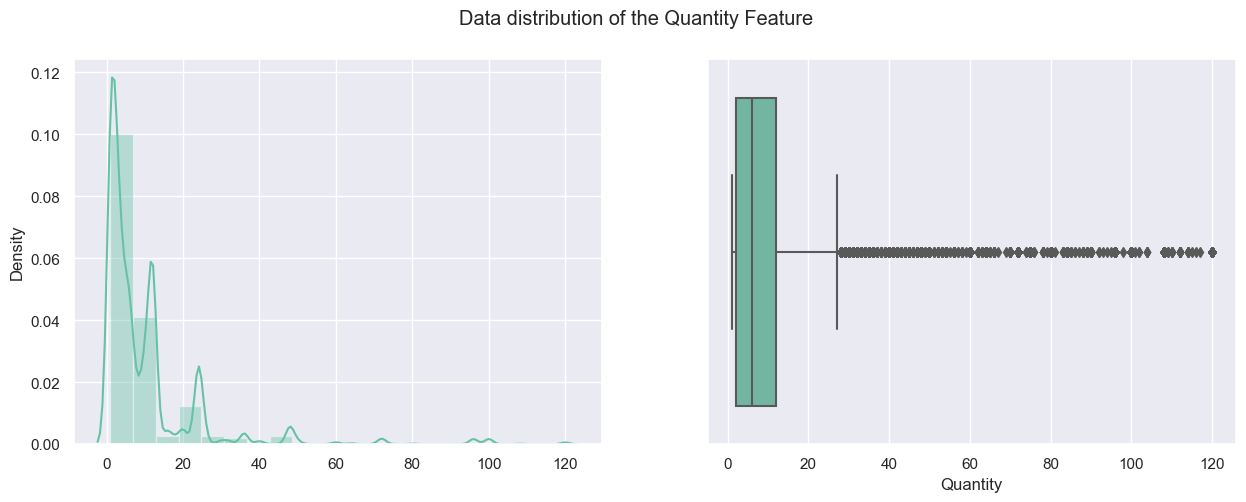

In [35]:
# Plotting histogram and boxplot for data distribution


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.suptitle("Data distribution of the Quantity Feature")
sns.distplot(x=cust_df.Quantity,bins=20)
plt.subplot(1,2,2)
sns.boxplot(cust_df.Quantity,)
plt.show()

**Insight:**
1. the distplot shows density of data point is the highest for the 0-5 bin, that means most of the customer intrested in buying quntity in between 0-5 and then 5-10.
2. and bin 15-20 is little higher than other quantity range.
3. the boxplot represents 75% customer buying product quantity is almost 15 value.
4. there are some other customer who bought higher quantity that is beyond 25 value they are considered as exception and treated as outlier in the boxplot. 

**5. InvoiceDate**

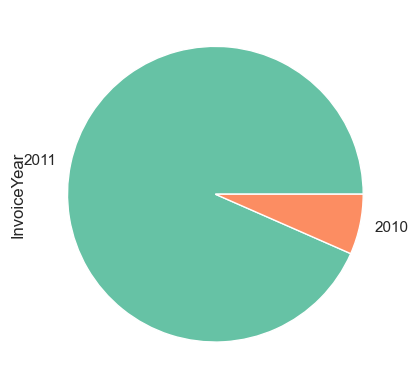

In [36]:
# pie chart for data contribution year wise
cust_df.InvoiceYear.value_counts(normalize=True).plot.pie()
plt.show()

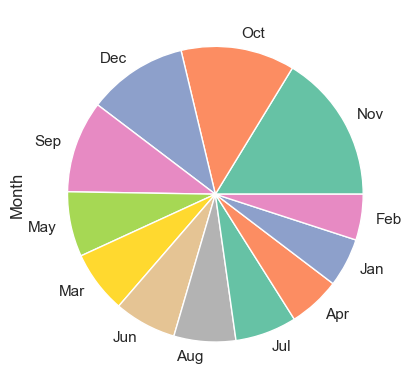

In [37]:
# Pie chart for month wise data contribution
cust_df.Month.value_counts(normalize=True).plot.pie()
plt.show()

**Insight:**
1. Most of the order placed in November month.
2. Frome the sep to december most of the business is coming from the customer it is because of the holiday season.
3. and after the holiday season Jan to april business is going down.

**6. UnitPrice**

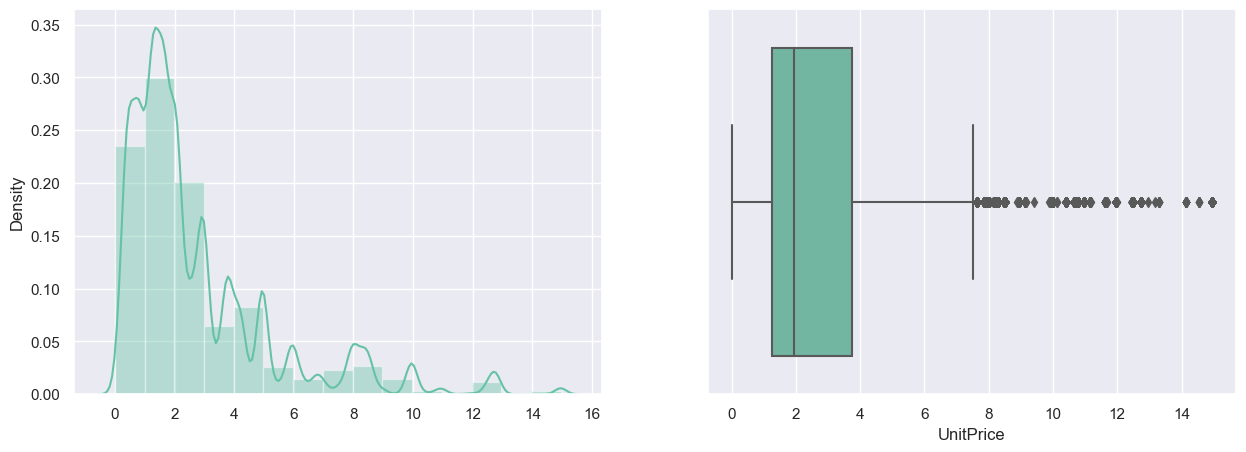

In [38]:
# histogram plot and boxplot for data distribution of the unit price
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(x=cust_df.UnitPrice,bins=15)
plt.subplot(1,2,2)
sns.boxplot(cust_df.UnitPrice)
plt.show()

**Insight:**
1. Most of the customer intrested in unit price 1-2 and then 0-1.
2. the boxplot represents 75% customer interested in unit price less than 4
3. there are few customer who also interested in high unit price of the products but beyond unit price somewhat around 7.5 are treated as outlier.

**7. CustomerID**

In [39]:
# Customer id wise transaction count
cust_df.CustomerID.value_counts()

17841    7813
14911    5485
14096    4902
12748    4546
14606    2680
         ... 
13703       1
17925       1
14351       1
17391       1
15940       1
Name: CustomerID, Length: 4290, dtype: int64

In [40]:
# number of unique customer
cust_df.CustomerID.nunique()

4290

total number of customer base is 4290

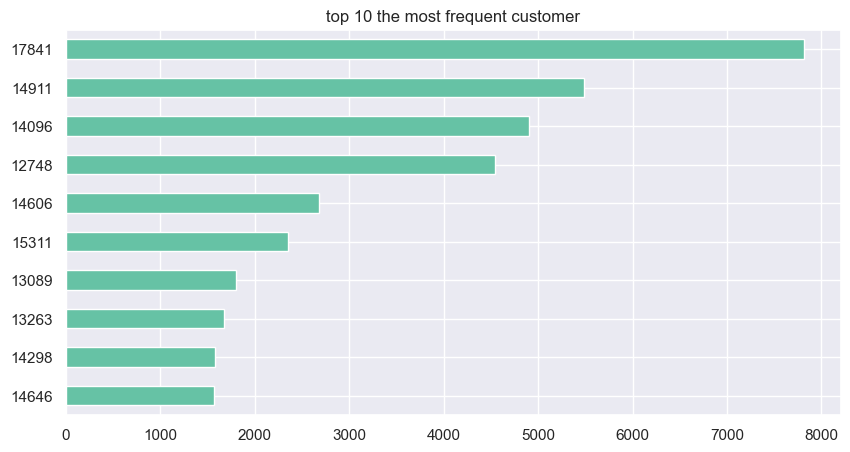

In [41]:
# top 10 customer based on the order count
plt.figure(figsize=(10,5))
cust_df.CustomerID.value_counts().head(10).sort_values(ascending=True).plot(kind='barh',title="top 10 the most frequent customer")
plt.show()


**8. Country**

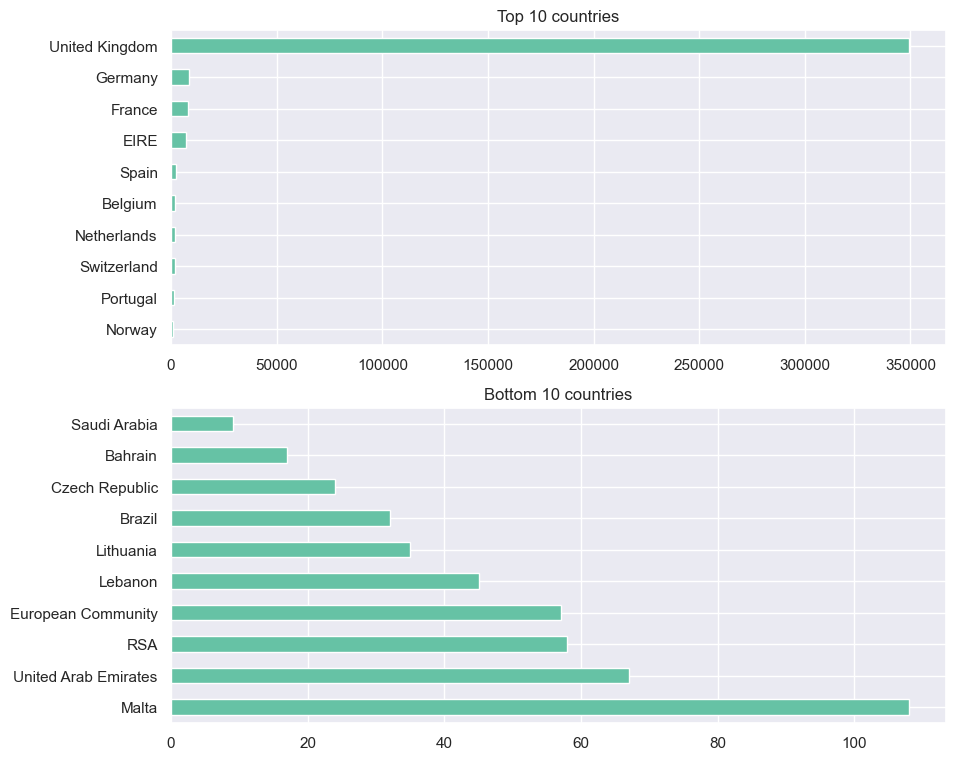

In [42]:
# top 10 country 
Figure,axes=plt.subplots(2,1,figsize=(10,9))
cust_df.Country.value_counts().head(10).sort_values(ascending=True).plot(kind='barh',ax=axes[0],title="Top 10 countries")

cust_df.Country.value_counts().tail(10).sort_values(ascending=False).plot(kind='barh',ax=axes[1],title="Bottom 10 countries")

plt.show()

**Insight:**
1. Most order is coming from the UK.
2. other than Uk only 4 countries are contributing in the sales germany, France, EIRE and spain. Other countries also need to be analyse to improve the sales in their region.

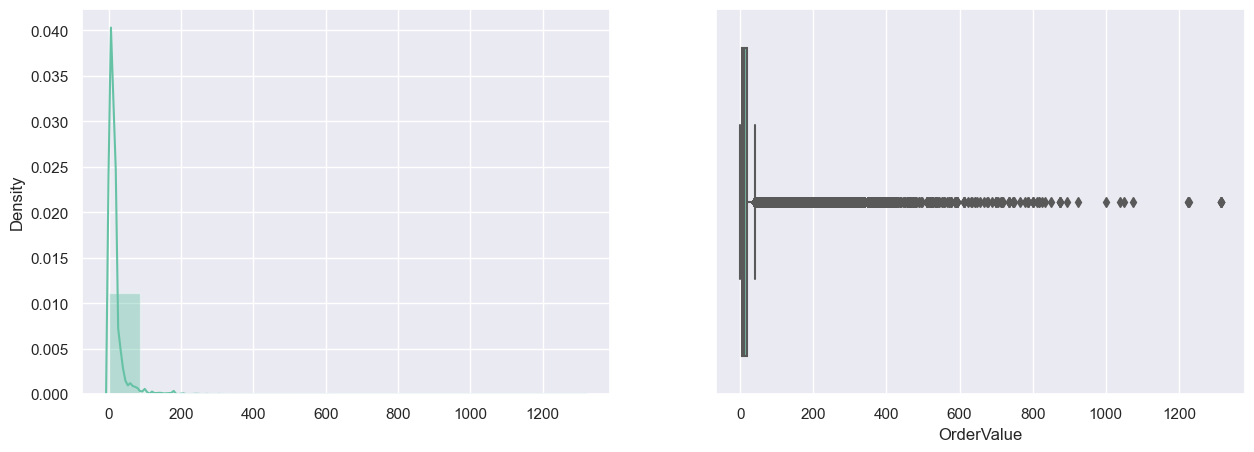

In [43]:
# histogram plot and boxplot for data distribution of the unit price
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(x=cust_df.OrderValue,bins=15)
plt.subplot(1,2,2)
sns.boxplot(cust_df.OrderValue)
plt.show()

### 1.2.2. Bivariate Analysis

**1.2.2.1 Product in high demand**

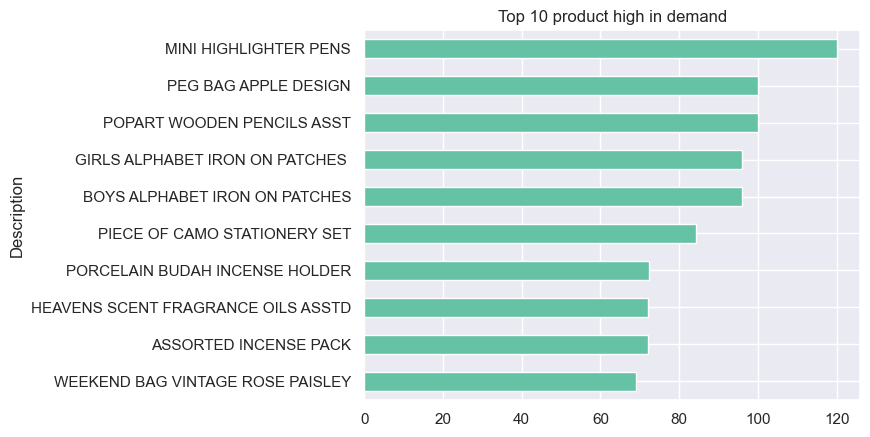

In [44]:
# plotting bar plot of the products for average high quantity demanded by the customer

cust_df.groupby(['Description'])['Quantity'].mean().sort_values(ascending=False).head(10).sort_values(ascending=True).plot(kind='barh',title='Top 10 product high in demand')
plt.show()

**Insight:**
1. order for average quantity of the mini highlighter pens is the highest i.e. 120.



**1.2.2.2 Frequently bought product vs highest quantity demanded**

In [45]:
# creating new dataframe for average quantity demand of the product
Product_df=pd.DataFrame(round(cust_df.groupby(['Description'])['Quantity'].mean(),2))

# creating new dataframe for average OrderValue demand of the product
Product_df_order=pd.DataFrame(round(cust_df.groupby(['Description'])['OrderValue'].mean(),2))

# creating new dataframe for average UnitPrice demand of the product
Product_df_price=pd.DataFrame(round(cust_df.groupby(['Description'])['UnitPrice'].mean(),2))

# creating new dataframe for frequency of the product
Product_freq=pd.DataFrame(cust_df.groupby(['Description'])['Description'].count())
Product_freq.rename(columns={'Description':'Frequency'},inplace=True)


# merging the frequency of the product with the average quantity in demand
Product_df=pd.merge(Product_df,Product_df_order,how='inner',on='Description')
Product_df=pd.merge(Product_df,Product_df_price,how='inner',on='Description')
Product_df=pd.merge(Product_df,Product_freq,how='inner',on='Description')

Product_df.head()

Quantity  OrderValue  UnitPrice  Frequency
Description                                                               
 4 PURPLE FLOCK DINNER CANDLES      3.59        6.94       2.32         39
 50'S CHRISTMAS GIFT BAG LARGE     13.75       17.19       1.25        108
 DOLLY GIRL BEAKER                  7.50        9.38       1.25        133
 I LOVE LONDON MINI BACKPACK        5.14       20.77       4.14         70
 I LOVE LONDON MINI RUCKSACK        1.00        4.15       4.15          1

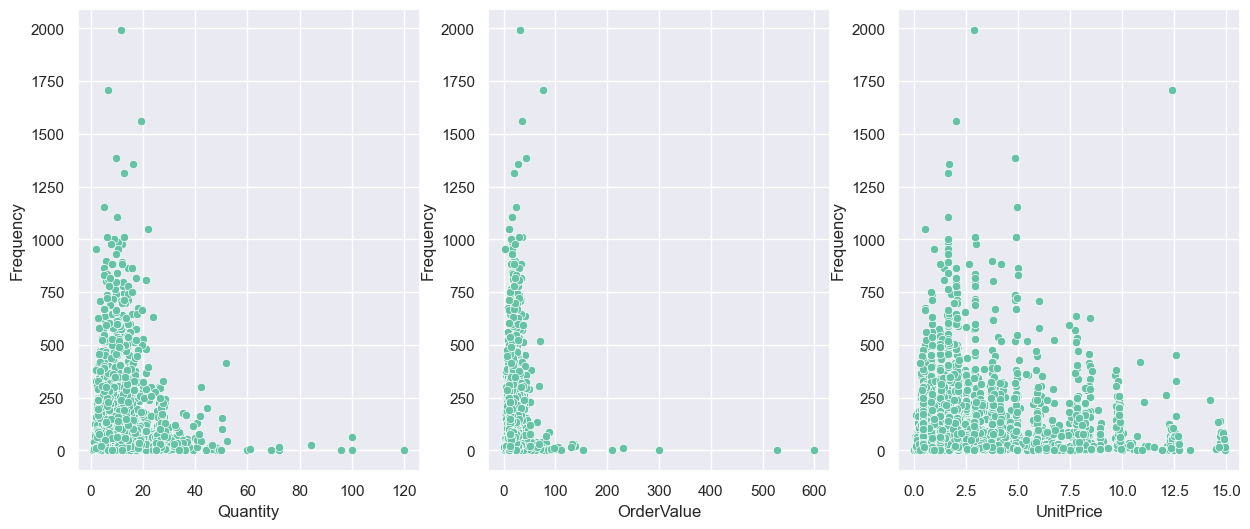

In [46]:
# plotting scatterplot 
Figure,axes=plt.subplots(1,3,figsize=(15,6))
sns.scatterplot(data=Product_df,x='Quantity',y='Frequency',ax=axes[0])
sns.scatterplot(data=Product_df,x='OrderValue',y='Frequency',ax=axes[1])
sns.scatterplot(data=Product_df,x='UnitPrice',y='Frequency',ax=axes[2])
plt.show()

there are some extreme value in ordervalue and quantity, dropping those values will help in better understanding the relationship

In [47]:
# dropping extreme value for better visualisation

Product_df=Product_df[Product_df.OrderValue<100]
Product_df=Product_df[Product_df.Quantity<60]

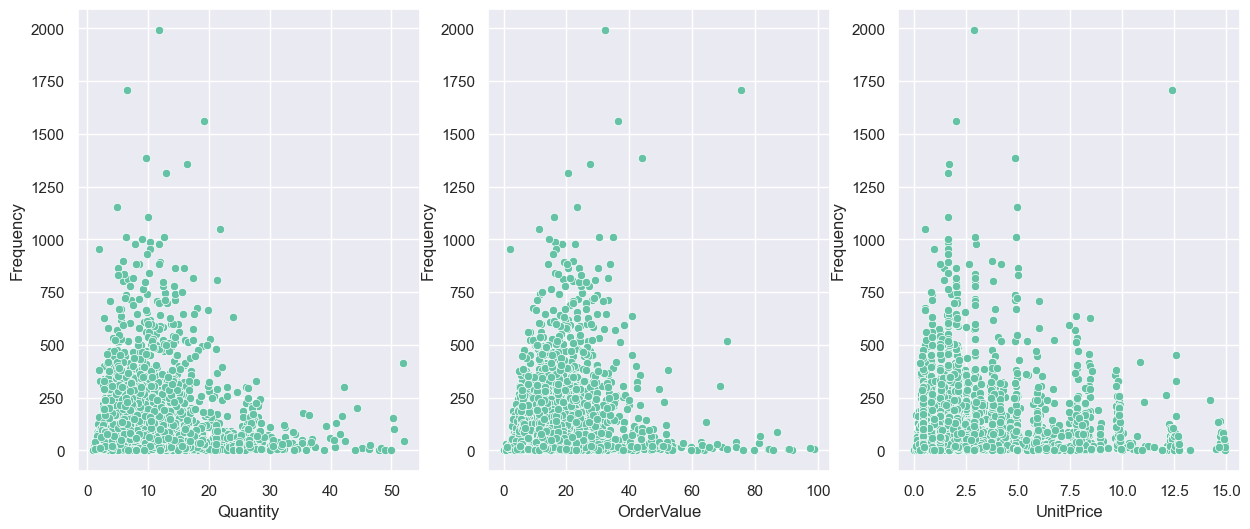

In [48]:
# replotting scatterplot 
Figure,axes=plt.subplots(1,3,figsize=(15,6))
sns.scatterplot(data=Product_df,x='Quantity',y='Frequency',ax=axes[0])
sns.scatterplot(data=Product_df,x='OrderValue',y='Frequency',ax=axes[1])
sns.scatterplot(data=Product_df,x='UnitPrice',y='Frequency',ax=axes[2])
plt.show()

**Insight:**
1. there is no linear relationship between frequent product and quantity of the product. 
2. thre are many product whose frequency is very high but their quantity value is not much and same there are some product whose many quantity demanded by the customer but they are not much popular.
3. frequency of the product has same relationship with average quantity demand and ordervalue placed by the customer.
4. as expected lower the unitprice there is high frequncy of the product.
5. so this will help in understanding the customer group who buys wholesale item in bulk as per their business requirement.

**1.2.2.3 Country wise average quantity in demand**

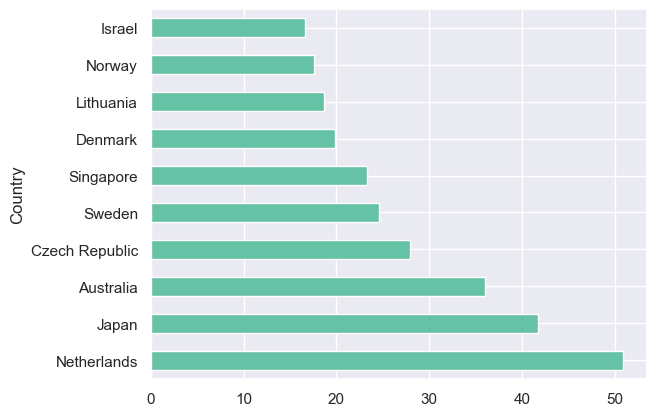

In [49]:
cust_df.groupby(['Country'])['Quantity'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

**Insight:**
1. most oredr frequency was received from UK but highest average quantity of the product is received from Netherland and then japan.
2. this helps in understanding the group of customer coming from these country to provide better product offer so that their frequency will improve to help in business growth.

**1.2.2.4. UnitPrice vs Quantity**

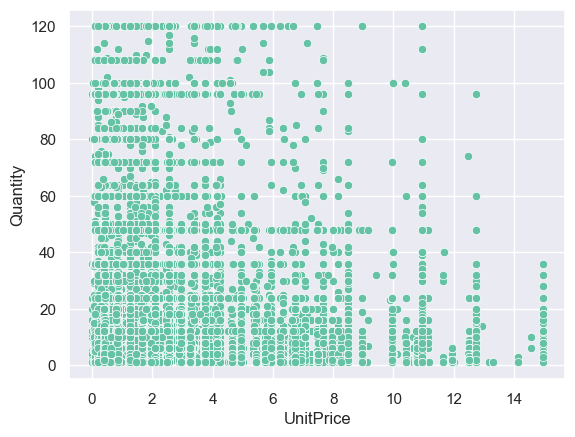

In [50]:
# plotting scatterplot between UnitPrice and Quantity of the product
sns.scatterplot(cust_df['UnitPrice'],cust_df['Quantity'])
plt.show()

**Insight:**
1. as the business startegy works lower unitprice high quantity demanded, the scatterplot shows the same relationship here too.
2. but there is some exception as well inspite of high unit price high quantity of the product is demanded by the customer, this helps in grouping those customer to understand their business need.

**1.2.2.5. HNI customer analysis**

HNI customers are High networth customer who placed high order. undersatnding their business need is very important for any retail company to grow their business. Lets create a new dataframe for such customer based on their transaction history value i.e. OrderValue feature

In [51]:
# creating new dataframe for HNI customer
top_20_HNI_list=list(cust_df.groupby(['CustomerID'])['OrderValue'].sum().sort_values(ascending=False).head(20).index)

In [52]:
# list of top 20 customer base
top_20_HNI_list

['14646',
 '14911',
 '17511',
 '14156',
 '12415',
 '18102',
 '15311',
 '13089',
 '14088',
 '14096',
 '14298',
 '13694',
 '17841',
 '15061',
 '13798',
 '12748',
 '13081',
 '13098',
 '13408',
 '17450']

In [53]:
cust_df['HNI_flag']=cust_df.CustomerID.apply(lambda x:int(x in top_20_HNI_list) )
top_20_HNI_cust=cust_df[cust_df.HNI_flag==1]
top_20_HNI_cust.reset_index(inplace=True,drop=True)
top_20_HNI_cust.head()

InvoiceNo StockCode                         Description  Quantity  \
0    536381     22139    RETROSPOT TEA SET CERAMIC 11 PC         23   
1    536381     84854                 GIRLY PINK TOOL SET         5   
2    536381     22411   JUMBO SHOPPER VINTAGE RED PAISLEY        10   
3    536381     82567           AIRLINE LOUNGE,METAL SIGN         2   
4    536381     21672  WHITE SPOT RED CERAMIC DRAWER KNOB         6   

      InvoiceDate  UnitPrice CustomerID         Country           Invoicedt  \
0  12/1/2010 9:41       4.25      15311  United Kingdom 2010-12-01 09:41:00   
1  12/1/2010 9:41       4.95      15311  United Kingdom 2010-12-01 09:41:00   
2  12/1/2010 9:41       1.95      15311  United Kingdom 2010-12-01 09:41:00   
3  12/1/2010 9:41       2.10      15311  United Kingdom 2010-12-01 09:41:00   
4  12/1/2010 9:41       1.25      15311  United Kingdom 2010-12-01 09:41:00   

   InvoiceYear Month  OrderValue  HNI_flag  
0         2010   Dec       97.75         1  
1         2010   Dec       24.75         1  
2         2010   Dec       19.50         1  
3         2010   Dec        4.20         1  
4         2010   Dec        7.50         1

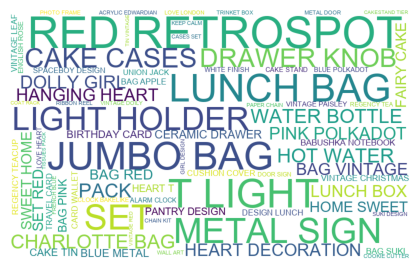

In [54]:
text = " ".join(item for item in top_20_HNI_cust.Description)
 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',font_path='arial',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
 
# plot the WordCloud image                      
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

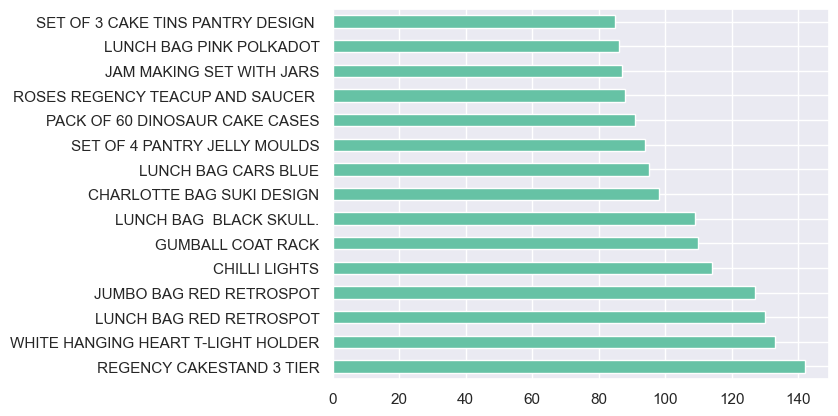

In [55]:
top_20_HNI_cust.Description.value_counts().head(15).plot(kind='barh')
plt.show()

**Insight:**
Regency Cakestand 3 Tier is highly popular among High networth customer group

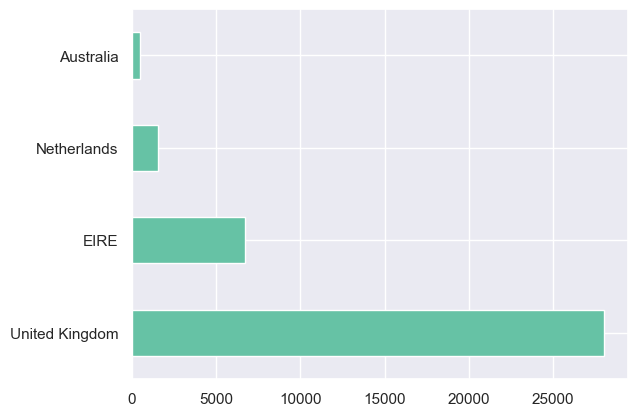

In [56]:
# plotting bar chart for the country of the HNI customer base
top_20_HNI_cust.Country.value_counts().plot(kind='barh')
plt.show()

**Insight:**
High net worth customer mostly from UK. This customer base is very important to grow the business of the company

In [57]:
# dropping HNI_flag feature
cust_df.drop(columns='HNI_flag',inplace=True)

**1.2.2.6. Correlation value of the feature**

In [58]:
#correlation matrix 
corr_0=cust_df.corr()
corr_0=corr_0.where(np.triu(np.ones(corr_0.shape),k=1).astype(np.bool))
corr_df_0=corr_0.unstack().reset_index()
corr_df_0.columns=['Var1_0','Var2_0','Correlation_0']
corr_df_0.dropna(subset=['Correlation_0'],inplace=True)
corr_df_0['Correlation_Abs_0']=corr_df_0['Correlation_0'].abs()
corr_df_0.drop('Correlation_0',axis=1,inplace=True)
corr_df_0.sort_values(by=['Correlation_Abs_0'],ascending=False,inplace=True)
corr_df_0

Var1_0       Var2_0  Correlation_Abs_0
12   OrderValue     Quantity           0.618183
4     UnitPrice     Quantity           0.250750
13   OrderValue    UnitPrice           0.193045
9   InvoiceYear    UnitPrice           0.017098
8   InvoiceYear     Quantity           0.012489
14   OrderValue  InvoiceYear           0.000587

**Insight:**
OrderValue feature is highly corelated to quantity of the product demanded by the customer.

## 2. Data Modeling

To create customer segment, it is important to understand their behaviour first from the past data. so in this application RFM analysis is being used to aggregate the data based on the customer to analyse the behaviour how they likely to have business based on their past purchasing history.

1. **Recency:** Number of days since last purchase.
2. **Frequency:** Number of transaction.
3. **Monetary:** Total amount of transaction (revenue from the customer)

creating new dataframe for RFM analysis of the customer

In [59]:
# creating monetary feature by CustomerID
rfm_df=pd.DataFrame(cust_df.groupby(['CustomerID'])['OrderValue'].sum())

# creating frequancy feature by customerid
freq=pd.DataFrame(cust_df.groupby(['CustomerID'])['InvoiceNo'].count())


In [60]:
# recency of the customer will be compared with the maximum date of the dataset
max_date=pd.to_datetime(max(cust_df.Invoicedt))
max_date

# getting diffenece of the days from the max_date and invoice date
cust_df['recent_purchase']=max_date - cust_df['Invoicedt']

# creating recency feature 
recency=pd.DataFrame(cust_df.groupby(['CustomerID'])['recent_purchase'].min())
recency['recent_purchase']=recency['recent_purchase'].dt.days

# merging all the feature in single dataframe for rfm analysis
rfm_df=pd.merge(rfm_df,freq,how='inner',on='CustomerID')
rfm_df=pd.merge(rfm_df,recency,how='inner',on='CustomerID')
rfm_df=rfm_df.reset_index()
rfm_df.rename(columns={'OrderValue':'Monetary','InvoiceNo':'Frequency','recent_purchase':'Recency'},inplace=True)
rfm_df.head()

CustomerID  Monetary  Frequency  Recency
0      12347   4060.40        181        1
1      12348   1186.68         21       74
2      12349   1353.80         70       18
3      12350    294.40         16      309
4      12352   1385.74         77       35

for customer segmentation, clustering algorithm is going to be applied on the rfm_df.

## 2.1 clustering algorithm

There are three popular clustering algorithm 
1. K-means
2. Hierarchical
3. DBSCAN
each clustering algorithm has their own benefit and limitation. This application will compare the result of each clustering.

### 2.1.1 Preprocessing of clustering algorithm

clustering algorithm like K-means and hierarchical are sensitive to outlier. so outliers should be handled before the algorithm application.

**2.1.1.1 Handling outlier**

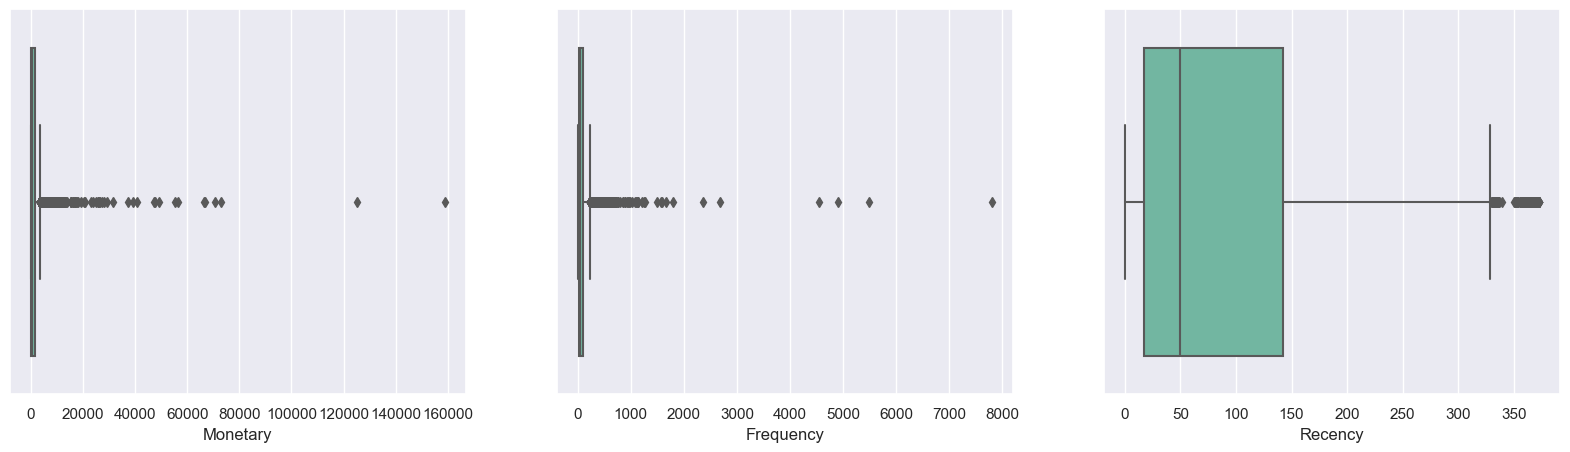

In [61]:
# plotting the outliers
Figure,axes=plt.subplots(1,3,figsize=(20,5))
sns.boxplot(rfm_df.Monetary,ax=axes[0])
sns.boxplot(rfm_df.Frequency,ax=axes[1])
sns.boxplot(rfm_df.Recency,ax=axes[2])
plt.show()

In [62]:
# describing the dataset
rfm_df.describe(percentiles=[0,0.01,0.25,0.5,0.75,0.9,0.91,0.95,0.96,0.97,0.98,0.99])

Monetary    Frequency      Recency
count    4290.000000  4290.000000  4290.000000
mean     1613.083600    90.977622    91.563170
std      4820.581093   225.201547    99.993443
min         2.900000     1.000000     0.000000
0%          2.900000     1.000000     0.000000
1%         41.998900     1.000000     0.000000
25%       290.210000    17.000000    17.000000
50%       637.695000    41.000000    50.000000
75%      1547.890000    99.000000   142.000000
90%      3355.141000   206.000000   262.100000
91%      3602.358700   218.000000   269.000000
95%      5240.463500   314.000000   310.000000
96%      5937.890400   344.640000   319.000000
97%      7146.660300   409.330000   334.000000
98%      9528.470400   472.000000   360.000000
99%     13247.250500   662.990000   368.000000
max    158967.800000  7813.000000   373.000000

the variation in the data value is not much high ,these outliers are those data points which are not within range of IQR. but these values holds important information about the high spending customer. and the rfm_df has less than 5000 rows. dropping any more information will leads to lose important information, so in capping these values within the range of IQR is the better way to handle the outliers.

In [63]:
# no of rows with outliers
print("Total no of rows in rfm_df ",rfm_df.shape[0])
print("no of rows with outliers in Monetary: ",rfm_df[rfm_df.Monetary>3355].shape[0])
print("no of rows with outliers in Frequency: ",rfm_df[rfm_df.Frequency>218].shape[0])
print("no of rows with outliers in Recency: ",rfm_df[rfm_df.Recency>319].shape[0])

Total no of rows in rfm_df  4290
no of rows with outliers in Monetary:  429
no of rows with outliers in Frequency:  386
no of rows with outliers in Recency:  171


In [64]:
# creating a copy of rfm_df
rfm_df_with_outlier=rfm_df.copy()

In [65]:
# capping the outliers within the percentile range
outlier_cols=['Monetary','Frequency']

percentiles = rfm_df['Monetary'].quantile([0.00, 0.90]).values
rfm_df['Monetary'] = np.clip(rfm_df['Monetary'], percentiles[0], percentiles[1])

percentiles = rfm_df['Frequency'].quantile([0.00, 0.91]).values
rfm_df['Frequency'] = np.clip(rfm_df['Frequency'], percentiles[0], percentiles[1])

percentiles = rfm_df['Recency'].quantile([0.00, 0.96]).values
rfm_df['Recency'] = np.clip(rfm_df['Recency'], percentiles[0], percentiles[1])


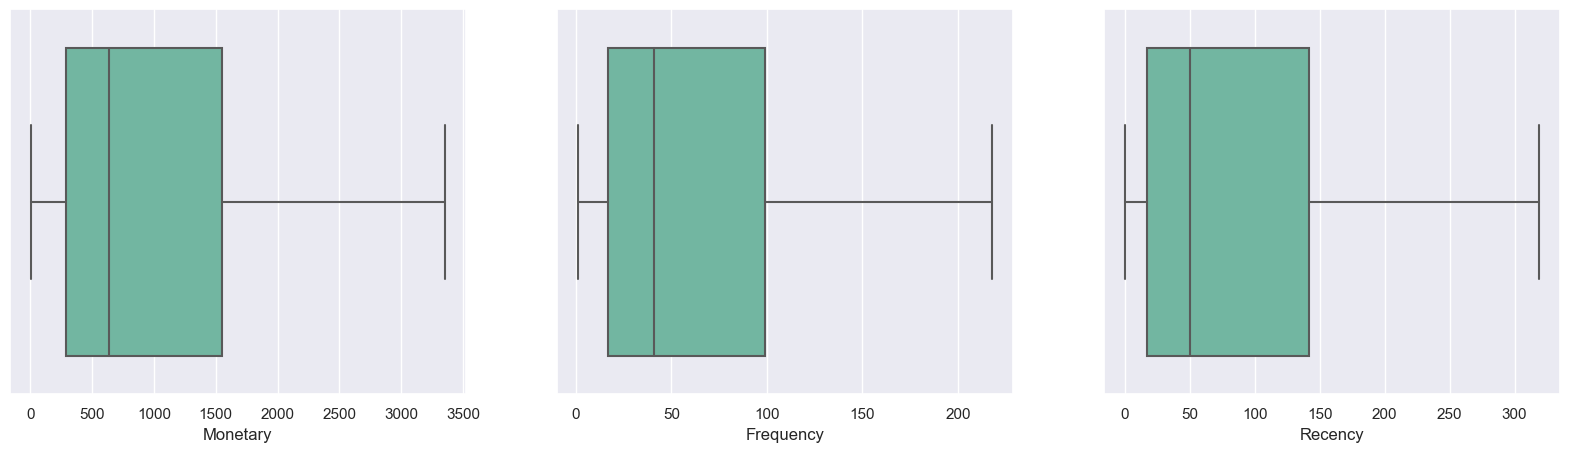

In [66]:
# replotting the boxplot 
Figure,axes=plt.subplots(1,3,figsize=(20,5))
sns.boxplot(rfm_df.Monetary,ax=axes[0])
sns.boxplot(rfm_df.Frequency,ax=axes[1])
sns.boxplot(rfm_df.Recency,ax=axes[2])
plt.show()

**All outliers are handled successfully**

**2.1.1.2. Droping the unrequired feature for model input**

In [67]:
# dropping the CustomerID
rfm_df_model=rfm_df.drop('CustomerID',axis=1)

In [68]:
rfm_df_model.head()

Monetary  Frequency  Recency
0  3355.141      181.0      1.0
1  1186.680       21.0     74.0
2  1353.800       70.0     18.0
3   294.400       16.0    309.0
4  1385.740       77.0     35.0

**2.1.1.3. Scaling the model dataset**

In [69]:
# importing ML libraraies
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import os # accessing directory structure
import plotly
import plotly.express as px
import plotly.graph_objects as go

In [70]:
# scaling the dataset
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df_model)
rfm_df_scaled.shape

(4290, 3)

In [71]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled,columns=rfm_df_model.columns)
rfm_df_scaled.head()

Monetary  Frequency   Recency
0  2.182245   1.679749 -0.924320
1  0.109071  -0.703677 -0.167803
2  0.268847   0.026248 -0.748145
3 -0.744001  -0.778159  2.267562
4  0.299384   0.130522 -0.571969

### 2.1.2 Clustering Model

### 2.1.2.1 K-means Clustering

plotting elbow curve to find the optimal cluster number

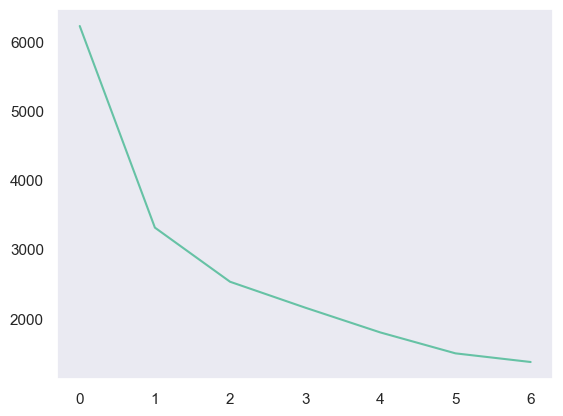

In [72]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.grid()
plt.show()

two elbow is formed one at cluter 1 and another one at 2. lets use the silhoutte analysis for parameter tunning for cluster number

In [73]:
# hyperparameter tunning for k-means
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state=100)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.49585619329048597
For n_clusters=3, the silhouette score is 0.5035411870170189
For n_clusters=4, the silhouette score is 0.4462463156632209
For n_clusters=5, the silhouette score is 0.4816897363765209
For n_clusters=6, the silhouette score is 0.4244798275789049
For n_clusters=7, the silhouette score is 0.40664190376210435
For n_clusters=8, the silhouette score is 0.3813580661737438


 elbow was formed at cluster 2 and its sillhoutte score is also good that is 0.49 but highest sillhoutte score is for cluster number 3 i.e. 0.50. and cluster 2 is not much significant to identifyig the target customer group so for k-means algorithm the optimal cluster number is 3

In [74]:
# initialising the k-means model for 3 cluster and fitting the model on the scaled dataset
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [75]:
# assign the label
rfm_df['cluster_id'] = kmeans.labels_
rfm_df.head()

CustomerID  Monetary  Frequency  Recency  cluster_id
0      12347  3355.141      181.0      1.0           1
1      12348  1186.680       21.0     74.0           2
2      12349  1353.800       70.0     18.0           2
3      12350   294.400       16.0    309.0           0
4      12352  1385.740       77.0     35.0           2

In [76]:
# the centre of the cluster
kmeans.cluster_centers_

array([[-0.66326655, -0.64720221,  1.57806148],
       [ 1.50993125,  1.493119  , -0.65429407],
       [-0.37805647, -0.3778818 , -0.43617141]])

**Evaluation**

In [77]:
siilhoute_score_k_means=silhouette_score(rfm_df_scaled, kmeans.labels_)
siilhoute_score_k_means

0.5035411870170189

**Visualising the cluster**

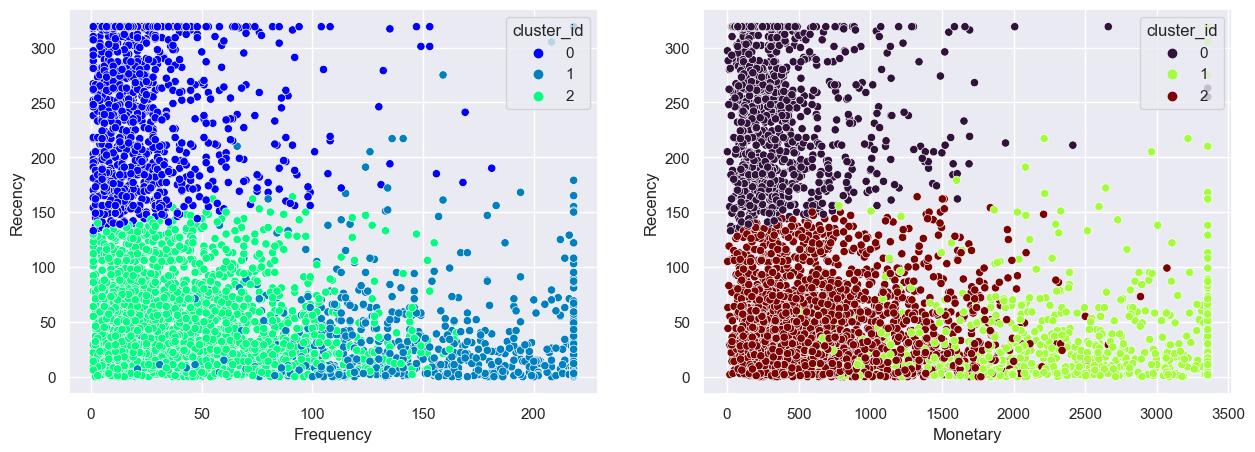

In [78]:
# plotting the cluster
Figure,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=rfm_df,x='Frequency',y='Recency',hue='cluster_id',palette='winter',ax=axes[0])
sns.scatterplot(data=rfm_df,x='Monetary',y='Recency',hue='cluster_id',palette='turbo',ax=axes[1])
plt.show()

**Insight**
three cluster and formed and those were visualise using above two plot.
1. for each plot cluster 1 is grouped properly there are some extreme data points are there but rest of the data points are grouped alright.
2. there some overlapping between cluster 0 and cluster 2 but they also grouped good.

In [79]:
# percentage of data distribution in each cluster
print('\033[1m'+'\033[94m'+"% of data distribution in each cluster")
rfm_df.cluster_id.value_counts(normalize=True)*100

% of data distribution in each cluster


2    52.121212
0    24.219114
1    23.659674
Name: cluster_id, dtype: float64

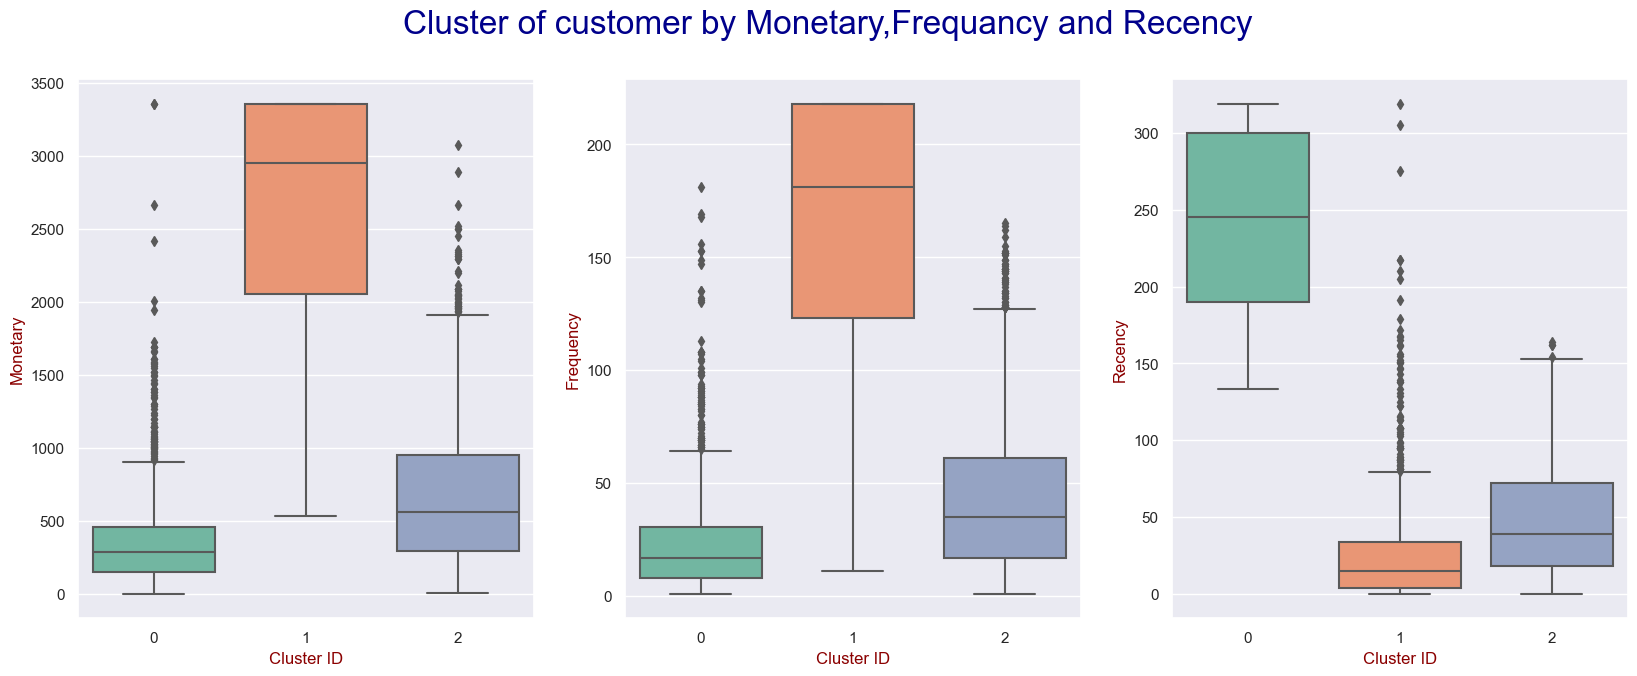

In [80]:
# plotting the boxplot for each cluster
Figure,axes=plt.subplots(1,3,figsize=(20,7))

sns.boxplot(x='cluster_id', y='Monetary', data=rfm_df,ax=axes[0])
axes[0].set_xlabel("Cluster ID",size='12',color='darkred')
axes[0].set_ylabel("Monetary",size='12',color='darkred')

sns.boxplot(x='cluster_id', y='Frequency', data=rfm_df,ax=axes[1])
axes[1].set_xlabel("Cluster ID",size='12',color='darkred')
axes[1].set_ylabel("Frequency",size='12',color='darkred')

sns.boxplot(x='cluster_id', y='Recency', data=rfm_df,ax=axes[2])
axes[2].set_xlabel("Cluster ID",size='12',color='darkred')
axes[2].set_ylabel("Recency",size='12',color='darkred')

plt.suptitle('Cluster of customer by Monetary,Frequancy and Recency',size=24,color='darkblue')

plt.show()

**Insight**
1. customer from cluster 1 has spend more and their average frequancy is the highest and their recency is also the lowest. this group of customer is high valued customer.
2. and customer group from 0 has the lowest average Monetary and frequency value and their recency is very high that means they havent done business with us from more than 100 days , so to improve the bussines from them they need to get more attention from the company

### 2.1.2.2 Hierarchical Clustering

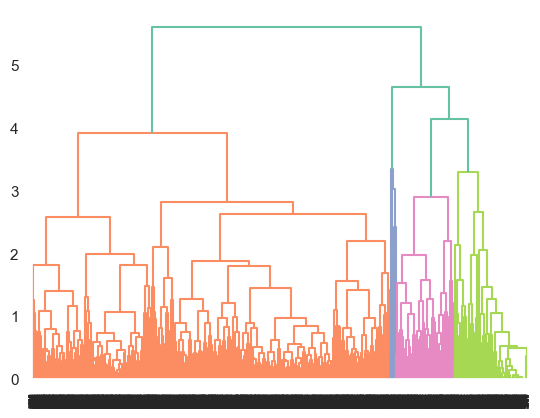

In [81]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

for cutting tree from top to bottom by drawing first horizontal line the two branches are found after that 3 and then 5 and so on. lets select n_cluster value 3 and 5 and revaluating the sillhoute score  

In [82]:
# for 3 clusters cutting the tree
cluster_val=[3,5]
for num_clusters in cluster_val:
    cluster_labels_h = cut_tree(mergings, n_clusters=num_clusters).reshape(-1, )
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels_h)
    print("for no of cluster {0} the silhouette score is :{1}".format(num_clusters, silhouette_avg))

for no of cluster 3 the silhouette score is :0.40204818130814063
for no of cluster 5 the silhouette score is :0.4464924762172535


**Evaluation of hierarchical clustering**

ffor number of cluster 5 the silhoute score is the highest i.e. 0.446. so lets create the hierarchical model for number of cluster 5


In [83]:
# creating new cluster based on value 5
cluster_labels_h = cut_tree(mergings, n_clusters=5).reshape(-1, )

# merging the cluster label to rfm_df
rfm_df['cluster_id_hierarchal']=cluster_labels_h
rfm_df.head()

CustomerID  Monetary  Frequency  Recency  cluster_id  cluster_id_hierarchal
0      12347  3355.141      181.0      1.0           1                      0
1      12348  1186.680       21.0     74.0           2                      1
2      12349  1353.800       70.0     18.0           2                      1
3      12350   294.400       16.0    309.0           0                      2
4      12352  1385.740       77.0     35.0           2                      1

In [84]:
# percentage of data distribution in each cluster
print('\033[1m'+'\033[94m'+"% of data distribution in each cluster")
rfm_df.cluster_id_hierarchal.value_counts(normalize=True)*100

% of data distribution in each cluster


1    48.041958
2    24.289044
0    14.755245
3    11.771562
4     1.142191
Name: cluster_id_hierarchal, dtype: float64

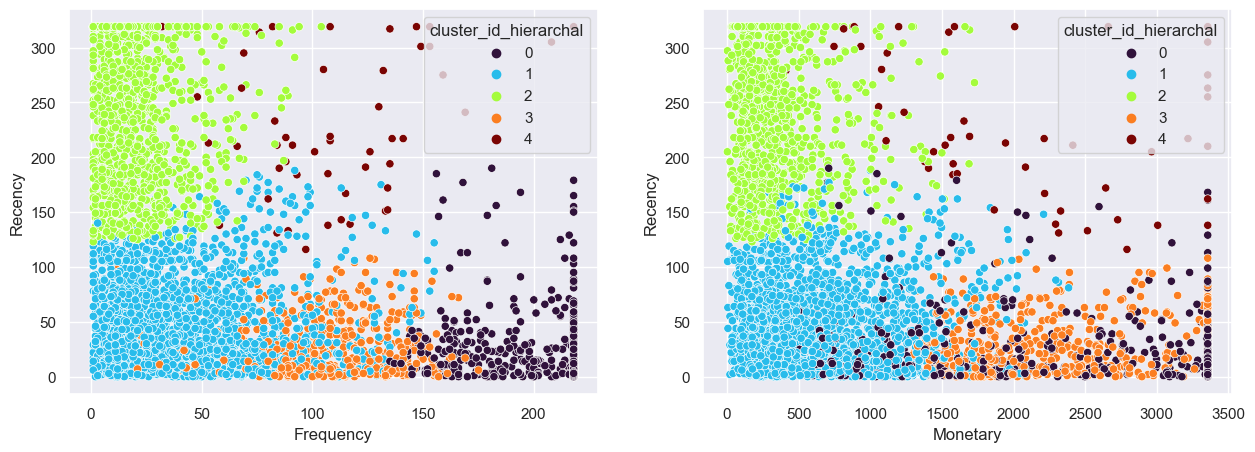

In [85]:
# plotting the cluster
Figure,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=rfm_df,x='Frequency',y='Recency',hue='cluster_id_hierarchal',palette='turbo',ax=axes[0])
sns.scatterplot(data=rfm_df,x='Monetary',y='Recency',hue='cluster_id_hierarchal',palette='turbo',ax=axes[1])
plt.show()

**Insight**:
1. cluster_1 and cluster_2 is properly grouped but cluster_0 is very scattered may be these datapoints are extreme points.
2. cluster_3 and cluster_4 are overlapping to each other there is no clear group formed.

since for the k-means cluster_value 3 was selected and here at cluster value 3 there is tree cutting option available for hierarachical model so lets create new model and compare the result with k-means

In [86]:
# lets create the hierarchical model for cluster number 3
# creating new cluster based on value 5
cluster_labels_h = cut_tree(mergings, n_clusters=3).reshape(-1, )

# merging the cluster label to rfm_df
rfm_df['cluster_id_hierarchal']=cluster_labels_h
rfm_df.head()


CustomerID  Monetary  Frequency  Recency  cluster_id  cluster_id_hierarchal
0      12347  3355.141      181.0      1.0           1                      0
1      12348  1186.680       21.0     74.0           2                      1
2      12349  1353.800       70.0     18.0           2                      1
3      12350   294.400       16.0    309.0           0                      1
4      12352  1385.740       77.0     35.0           2                      1

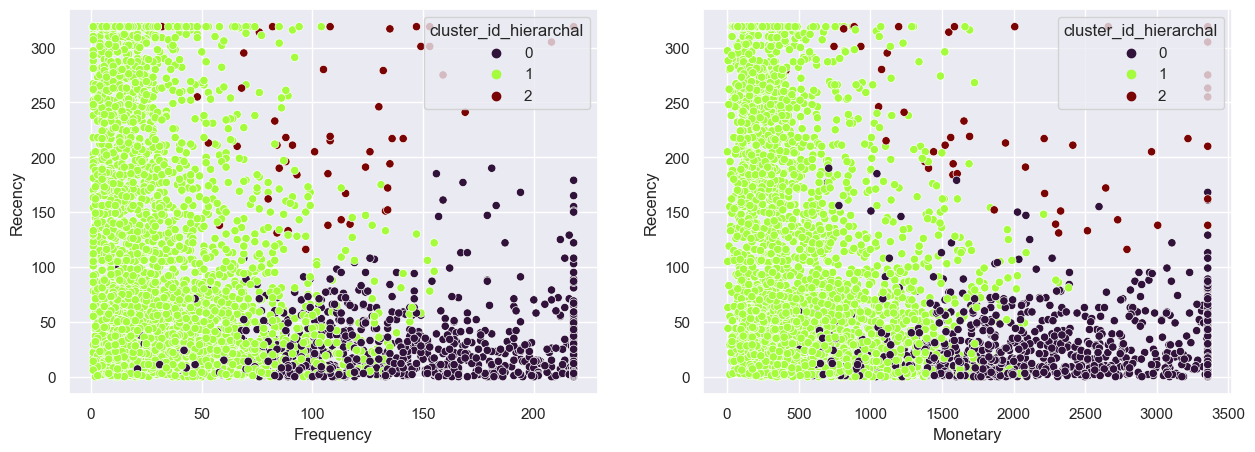

In [87]:
# plotting the cluster
Figure,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=rfm_df,x='Frequency',y='Recency',hue='cluster_id_hierarchal',palette='turbo',ax=axes[0])
sns.scatterplot(data=rfm_df,x='Monetary',y='Recency',hue='cluster_id_hierarchal',palette='turbo',ax=axes[1])
plt.show()

there is only two proper cluster is formed i.e. cluster_1 and 0 and third cluster i.e. 2 represents the extreme data points.

In [88]:
# percentage of data distribution in each cluster
print('\033[1m'+'\033[94m'+"% of data distribution in each cluster")
rfm_df.cluster_id_hierarchal.value_counts(normalize=True)*100

% of data distribution in each cluster


1    72.331002
0    26.526807
2     1.142191
Name: cluster_id_hierarchal, dtype: float64

### 2.1.2.3 DBSCAN clustering

In [89]:
from sklearn.cluster import DBSCAN

In [90]:
from itertools import product
eps_values_range = np.arange(0.25,1,0.25) # eps values to be investigated
min_samples_range = np.arange(3,10) 
for i, j in product(eps_values_range, min_samples_range):
    dbs=DBSCAN(eps=i,min_samples=j).fit(rfm_df_scaled)
    cluster_label_db=dbs.labels_
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_label_db)
    print("for no of eps value {0} and min_sample{1} the silhouette score is :{2}".format(i, j,silhouette_avg))


for no of eps value 0.25 and min_sample3 the silhouette score is :-0.38310005169073946
for no of eps value 0.25 and min_sample4 the silhouette score is :-0.293528548327352
for no of eps value 0.25 and min_sample5 the silhouette score is :-0.23626575677379721
for no of eps value 0.25 and min_sample6 the silhouette score is :-0.12461076019730553
for no of eps value 0.25 and min_sample7 the silhouette score is :-0.1408349954221637
for no of eps value 0.25 and min_sample8 the silhouette score is :-0.15715684136371386
for no of eps value 0.25 and min_sample9 the silhouette score is :-0.2041149180237457
for no of eps value 0.5 and min_sample3 the silhouette score is :0.2024000460719615
for no of eps value 0.5 and min_sample4 the silhouette score is :0.19827644661892704
for no of eps value 0.5 and min_sample5 the silhouette score is :0.1893278644272567
for no of eps value 0.5 and min_sample6 the silhouette score is :0.2732135831408182
for no of eps value 0.5 and min_sample7 the silhouette sco

In [91]:
min_samples_range

array([3, 4, 5, 6, 7, 8, 9])

In [92]:
dbs = DBSCAN(eps=0.75, min_samples=3)
dbs.fit(rfm_df_scaled)
cluster_labels_db = dbs.labels_
#silhouette_score(rfm_df_scaled,cluster_labels)

In [93]:
# assign the label
rfm_df['cluster_id_db'] = cluster_labels_db
rfm_df.head()

CustomerID  Monetary  Frequency  Recency  cluster_id  cluster_id_hierarchal  \
0      12347  3355.141      181.0      1.0           1                      0   
1      12348  1186.680       21.0     74.0           2                      1   
2      12349  1353.800       70.0     18.0           2                      1   
3      12350   294.400       16.0    309.0           0                      1   
4      12352  1385.740       77.0     35.0           2                      1   

   cluster_id_db  
0              0  
1              0  
2              0  
3              0  
4              0

In [94]:
rfm_df.cluster_id_db.value_counts()

 0    4287
-1       3
Name: cluster_id_db, dtype: int64

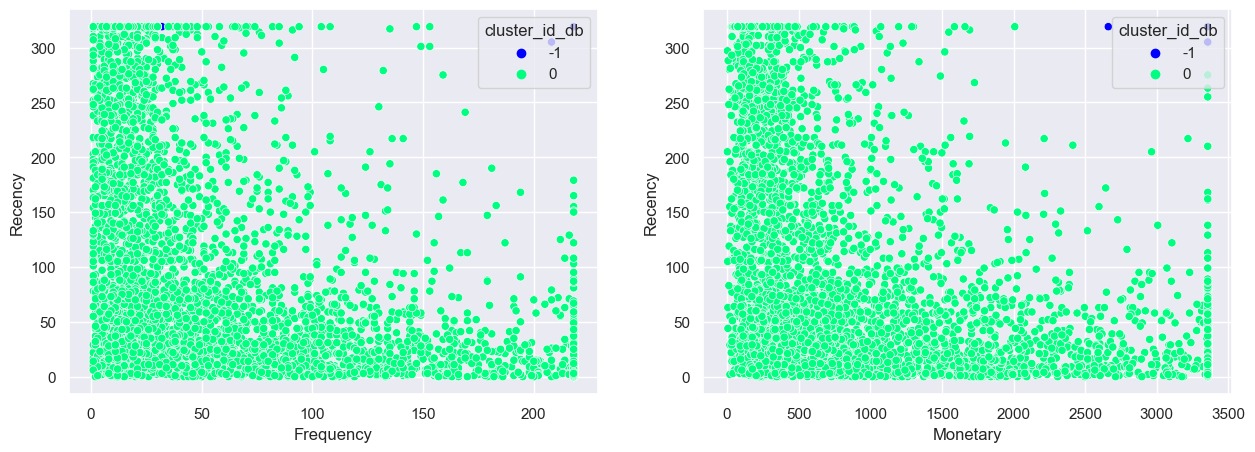

In [95]:
# plotting the cluster
Figure,axes=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=rfm_df,x='Frequency',y='Recency',hue='cluster_id_db',palette='winter',ax=axes[0])
sns.scatterplot(data=rfm_df,x='Monetary',y='Recency',hue='cluster_id_db',palette='winter',ax=axes[1])
plt.show()

In [96]:
# percentage of data distribution in each cluster
print('\033[1m'+'\033[94m'+"% of data distribution in each cluster")
rfm_df.cluster_id_db.value_counts(normalize=True)*100

% of data distribution in each cluster


 0    99.93007
-1     0.06993
Name: cluster_id_db, dtype: float64

### 2.1.3 Result comparison

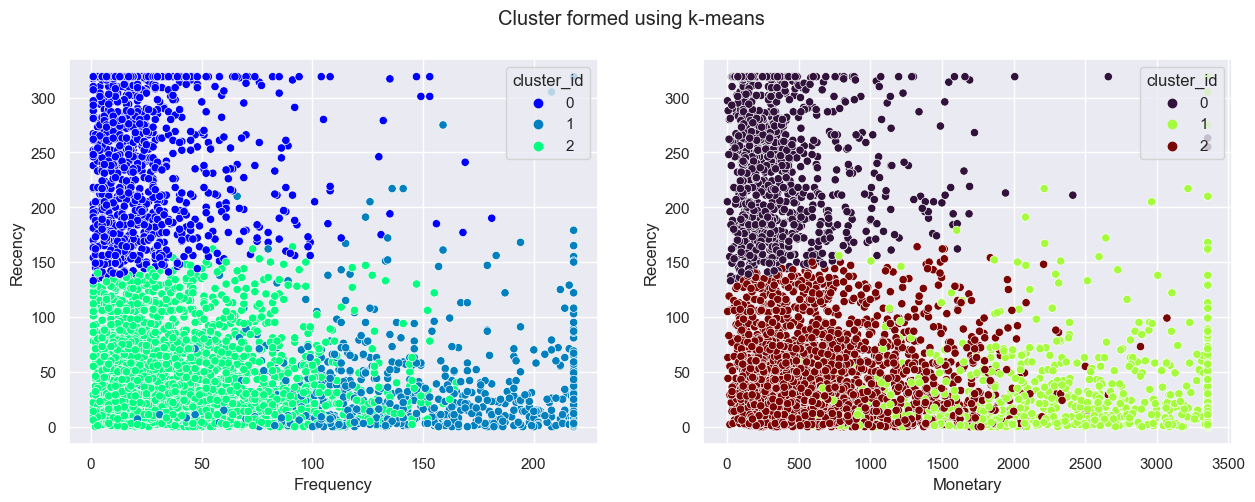

In [97]:
# cluster from K-means
Figure,axes=plt.subplots(1,2,figsize=(15,5))
plt.suptitle("Cluster formed using k-means")
sns.scatterplot(data=rfm_df,x='Frequency',y='Recency',hue='cluster_id',palette='winter',ax=axes[0])
sns.scatterplot(data=rfm_df,x='Monetary',y='Recency',hue='cluster_id',palette='turbo',ax=axes[1])
plt.show()

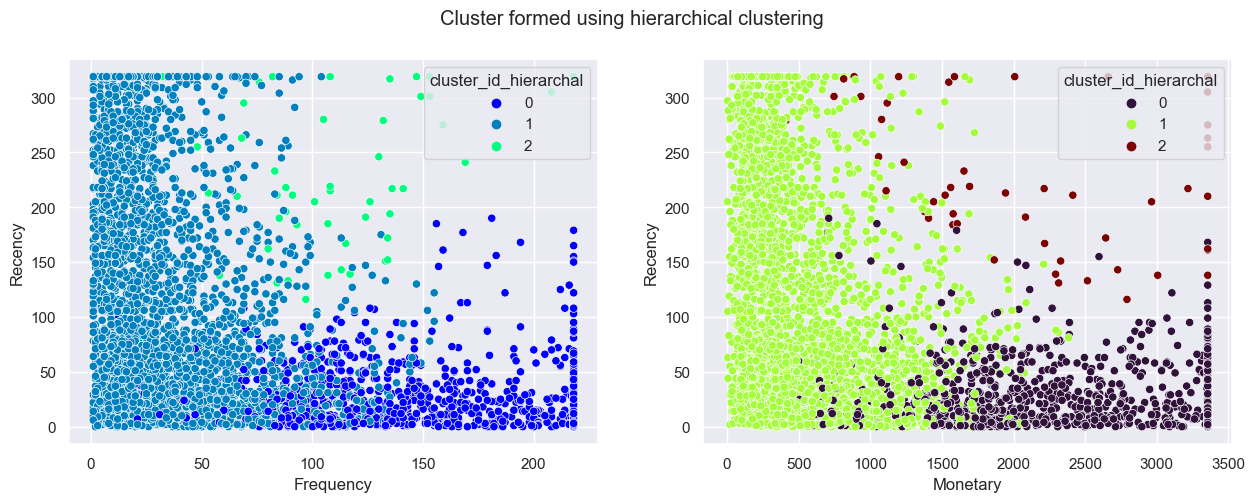

In [98]:
# cluster from hierarchical
Figure,axes=plt.subplots(1,2,figsize=(15,5))
plt.suptitle("Cluster formed using hierarchical clustering")
sns.scatterplot(data=rfm_df,x='Frequency',y='Recency',hue='cluster_id_hierarchal',palette='winter',ax=axes[0])
sns.scatterplot(data=rfm_df,x='Monetary',y='Recency',hue='cluster_id_hierarchal',palette='turbo',ax=axes[1])
plt.show()

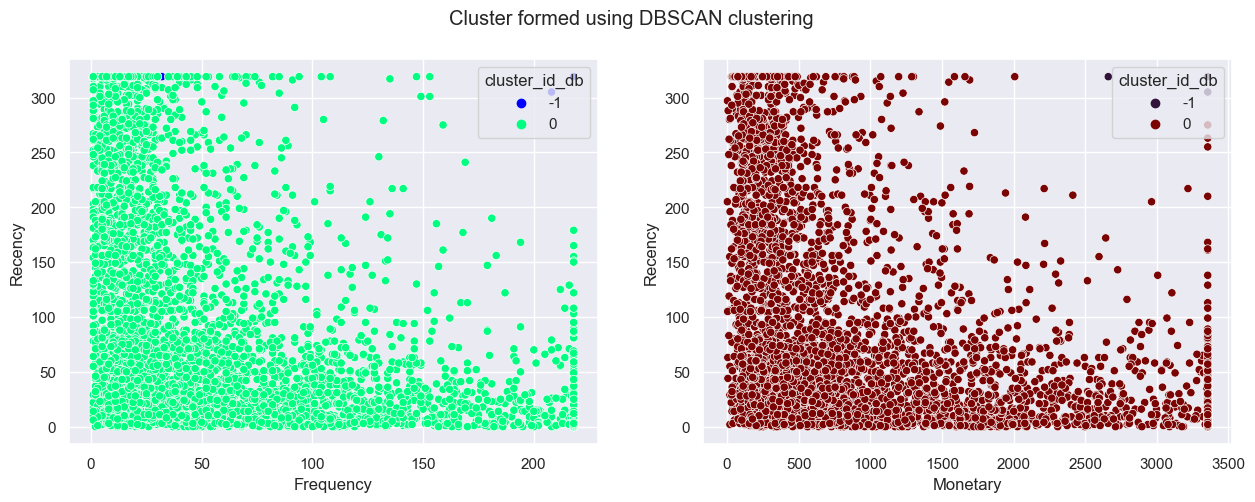

In [99]:
# cluster from DBSCAN
Figure,axes=plt.subplots(1,2,figsize=(15,5))
plt.suptitle("Cluster formed using DBSCAN clustering")
sns.scatterplot(data=rfm_df,x='Frequency',y='Recency',hue='cluster_id_db',palette='winter',ax=axes[0])
sns.scatterplot(data=rfm_df,x='Monetary',y='Recency',hue='cluster_id_db',palette='turbo',ax=axes[1])
plt.show()

from the above chart observation it is very clear that the cluster formed from k-means algorithm is perfect. furthermore k-means result will be used to group the customer and the prediction of the product segment will be performed using the same cluster category

### 2.1.4 assigning the final cluster_id to the main dataset

In [100]:
# keeping only k-means cluster and dropping other from rfm dataset
rfm_df.drop(columns=['cluster_id_hierarchal','cluster_id_db'],inplace=True,axis=1)
rfm_df.head()

CustomerID  Monetary  Frequency  Recency  cluster_id
0      12347  3355.141      181.0      1.0           1
1      12348  1186.680       21.0     74.0           2
2      12349  1353.800       70.0     18.0           2
3      12350   294.400       16.0    309.0           0
4      12352  1385.740       77.0     35.0           2

**creating a classification model to predict the cluster group for product option for the customer.** 

In [101]:
cust_cluster_df=pd.merge(cust_df,rfm_df[['CustomerID','cluster_id']],on='CustomerID',how='left')

In [102]:
cust_cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390294 entries, 0 to 390293
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   InvoiceNo        390294 non-null  object         
 1   StockCode        390294 non-null  object         
 2   Description      390294 non-null  object         
 3   Quantity         390294 non-null  int64          
 4   InvoiceDate      390294 non-null  object         
 5   UnitPrice        390294 non-null  float64        
 6   CustomerID       390294 non-null  object         
 7   Country          390294 non-null  object         
 8   Invoicedt        390294 non-null  datetime64[ns] 
 9   InvoiceYear      390294 non-null  int64          
 10  Month            390294 non-null  object         
 11  OrderValue       390294 non-null  float64        
 12  recent_purchase  390294 non-null  timedelta64[ns]
 13  cluster_id       390294 non-null  int32          
dtypes: d

## 2.2 Classification model

### 2.2.1 Logistic classification

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [104]:
rfm_df.head()

CustomerID  Monetary  Frequency  Recency  cluster_id
0      12347  3355.141      181.0      1.0           1
1      12348  1186.680       21.0     74.0           2
2      12349  1353.800       70.0     18.0           2
3      12350   294.400       16.0    309.0           0
4      12352  1385.740       77.0     35.0           2

### 2.2.2 splitting of target feature and independent feature

In [105]:
# splitting independent feature 
X = rfm_df.drop(columns=['cluster_id','CustomerID'], axis=1)

X.head()

Monetary  Frequency  Recency
0  3355.141      181.0      1.0
1  1186.680       21.0     74.0
2  1353.800       70.0     18.0
3   294.400       16.0    309.0
4  1385.740       77.0     35.0

In [106]:
# target feature 
y=rfm_df['cluster_id']
y.value_counts()

2    2236
0    1039
1    1015
Name: cluster_id, dtype: int64

### 2.2.3 train and test split

In [107]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [108]:
print('size of train dataset: ',X_train.shape)
print('size of test dataset: ',X_test.shape)

size of train dataset:  (3003, 3)
size of test dataset:  (1287, 3)


### 2.2.4 scaling the feature

In [109]:
scaler = StandardScaler()

# fit_transform
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled.shape)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=scaler.transform(X_test)
X_train_scaled.head()

(3003, 3)


Monetary  Frequency   Recency
0  0.182090   2.217730 -0.617083
1  1.292989   2.217730 -0.741661
2 -0.424163  -0.512292  0.410687
3 -0.616553  -0.645825 -0.544413
4 -0.800062  -0.794196 -0.575557

### 2.2.5 Logistic classification model

**Fitting the model on train dataset**

In [110]:
# initialising logisticregression model for multi class classification 
lr_model_clf=LogisticRegression(random_state=100,multi_class='multinomial',solver='lbfgs')

# fitting the classifier on train dataset
lr_classifier=lr_model_clf.fit(X_train_scaled,y_train)

**Prediction for train set**

In [111]:
y_train_predict=lr_classifier.predict(X_train_scaled)

**Evaluation of the prediction**

In [112]:
# Let's check the overall accuracy.
print('\033[1m'+'accuracy score of train dataset the prediction result',round(metrics.accuracy_score(y_train,y_train_predict),3)*100,'%')
print('\033[1m'+'\033[91m'+"\nconfusion matrix of train dataset the prediction"+'\033[0m')
confusion_mtrx=metrics.confusion_matrix(y_train,y_train_predict)
print(confusion_mtrx)
print('\033[1m'+'\033[91m'+"\nClassification report of the train set : \n"+'\033[0m',classification_report(y_train,y_train_predict))

accuracy score of train dataset the prediction result 99.6 %

confusion matrix of train dataset the prediction
[[ 729    0    2]
 [   0  705    5]
 [   6    0 1556]]

Classification report of the train set : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       731
           1       1.00      0.99      1.00       710
           2       1.00      1.00      1.00      1562

    accuracy                           1.00      3003
   macro avg       1.00      1.00      1.00      3003
weighted avg       1.00      1.00      1.00      3003



**accuracy score of train set is 99.6% and the confusion matrix of the predicted value is almost accurate. and from classification report f1-score shows the lowest misclassication cost for each cluster**

**Validating the test dataset**

In [113]:
# predicting the class labels for test set
y_test_predict=lr_classifier.predict(X_test_scaled)


In [114]:
# Let's check the overall accuracy.
print('\033[1m'+'accuracy score of test dataset the prediction result',round(metrics.accuracy_score(y_test,y_test_predict),5)*100,'%')
print('\033[1m'+'\033[91m'+"\nconfusion matrix of test dataset the prediction"+'\033[0m')
confusion_mtrx=metrics.confusion_matrix(y_test,y_test_predict)
print(confusion_mtrx)
print('\033[1m'+'\033[91m'+"\nClassification report of the test set : \n"+'\033[0m',classification_report(y_test,y_test_predict))


accuracy score of test dataset the prediction result 99.611 %

confusion matrix of test dataset the prediction
[[305   0   3]
 [  0 305   0]
 [  2   0 672]]

Classification report of the test set : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       308
           1       1.00      1.00      1.00       305
           2       1.00      1.00      1.00       674

    accuracy                           1.00      1287
   macro avg       1.00      1.00      1.00      1287
weighted avg       1.00      1.00      1.00      1287



accuracy score of the test dataset is 99.611% almost same as trainset and from the confusion matrix it is observed that the all the class labels are perfectly classified.

## 3. model deployment

In [115]:
import pickle

In [116]:
# exporting the pickle file of the classifier for model deployment
pickle.dump(lr_classifier,open('logistic_regression_model.pkl','wb'))

**classifier model exported successfully.** now this classifier will be used to predict the cluster of the customer and based on that top product offers will be shared to them for target marketing.

In [117]:
# exporting the rfm dataset for training set
rfm_df.to_csv("rfm.csv")

In [118]:
# exporting the product information with unitprice 
product_price_catlog=pd.DataFrame(cust_cluster_df.groupby(['Description'])['UnitPrice'].mean())
product_price_catlog['UnitPrice']=round(product_price_catlog.UnitPrice,2)
product_price_catlog.to_csv('item_price_catalog.csv')

In [119]:
# exporting the each cluster inforamation
cluster_0_df=pd.DataFrame(cust_cluster_df[cust_cluster_df.cluster_id==0].Description.value_counts()).head(20)
cluster_1_df=pd.DataFrame(cust_cluster_df[cust_cluster_df.cluster_id==1].Description.value_counts()).head(20)
cluster_2_df=pd.DataFrame(cust_cluster_df[cust_cluster_df.cluster_id==2].Description.value_counts()).head(20)
cluster_0_df.to_csv("cluster_0_df.csv")
cluster_1_df.to_csv("cluster_1_df.csv")
cluster_2_df.to_csv("cluster_2_df.csv")